In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean


import matplotlib.ticker as ticker
scale_factor = 1e6

pd.set_option('display.float_format', '{:.2f}'.format)
sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'Ubuntu'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Inconsolata Medium'
plt.rcParams['axes.labelsize'] = 23
plt.rcParams['axes.titlesize'] = 23
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['figure.titlesize'] = 24
plt.rcParams['figure.figsize'] = (6, 4)
%matplotlib inline

In [3]:
df = pd.read_csv("data/results_rq1.csv")

findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.


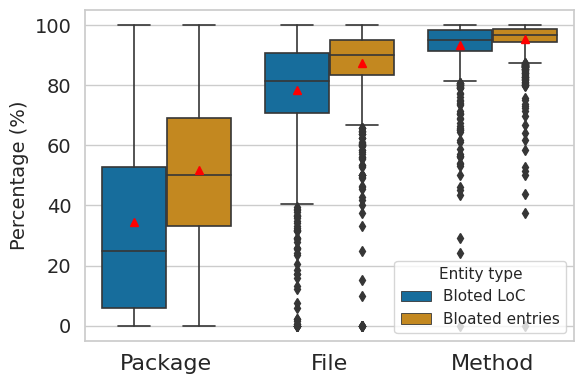

In [4]:
metrics_count = ['PBD', 'PBFD', 'PBMD']
metrics_loc = ['PBD-LOC', 'PBFD-LOC', 'PBMD-LOC']

rename_dict = {
    'PBMD': 'Method',
    'PBD': 'Package',
    'PBFD': 'File',
}

# Melt count metrics

df_count = df[metrics_count].melt(var_name='metric', value_name='value')
df_count['Type'] = 'Bloated entries'

# Melt loc metrics
df_loc = df[metrics_loc].melt(var_name='metric', value_name='value')
df_loc['Type'] = 'Bloted LoC'

# Replace '-LOC' from metric names in loc df
df_loc['metric'] = df_loc['metric'].str.replace('-LOC', '')

# Combine the two melted dataframes
df_melted = pd.concat([df_count, df_loc])

df_melted['metric'] = df_melted['metric'].map(rename_dict)
df_melted['Type'] = pd.Categorical(df_melted['Type'], categories=['Bloted LoC', 'Bloated entries'], ordered=True)

# ax = sns.violinplot(data=df_melted, x="value", y="metric", hue="Type", palette=['blue', 'orange'], split=False,  orient = 'h', inner="box")
ax = sns.boxplot(data=df_melted, x="metric", y="value", hue="Type", 
            orient='v', linewidth=1.2,  palette="colorblind",
            showmeans=True,
            meanprops={"marker":"^","markerfacecolor":"red", "markeredgecolor":"red"}) 
# sns.violinplot(data=df_melted, x="value", y="metric", hue="Type", palette=['blue', 'orange'], split=False,  orient = 'h', inner=None, saturation=0.7)

# plt.title("Bloated Entities Analysis", fontsize=18)
ax.legend( title="Entity type", frameon=True, fontsize=11, title_fontsize=11)

plt.xlabel("")
plt.ylabel("Percentage (%)", fontsize=14)
plt.tight_layout()
plt.savefig('figures/rq1.pdf',  bbox_inches='tight',)
plt.show()



In [5]:
df["NBD"].sum()

13206

In [6]:
total_unique_unresolved = df["unique_unresolved_count"].sum()
total_unique_resolved = df["unique_resolved_count"].sum()
total_unresolved = df["unresolved_count"].sum()
total_resolved = df["resolved_count"].sum()

total_unique = total_unique_unresolved + total_unique_resolved
total_all = total_unresolved + total_resolved

avg_unique_unresolved = total_unique_unresolved / len(df)
avg_unique_resolved = total_unique_resolved / len(df)
avg_unresolved = total_unresolved / len(df)
avg_resolved = total_resolved / len(df)


avg_unique_total = avg_unique_unresolved + avg_unique_resolved
avg_total = avg_unresolved + avg_resolved

In [7]:
(total_unique_unresolved, total_unique_resolved, total_unresolved, total_resolved, total_unique, total_all, avg_unique_unresolved, avg_unique_resolved, avg_unresolved, avg_resolved, avg_unique_total, avg_total)


(260249,
 7799929,
 5105727.0,
 35964913.0,
 8060178,
 41070640.0,
 199.88402457757297,
 5990.728878648233,
 3921.4493087557603,
 27622.82104454685,
 6190.612903225806,
 31544.27035330261)

In [8]:
df.describe()

,NBD,NBFD,NBMD,NBD-LOC,NBFD-LOC,NBMD-LOC,PBD,PBFD,PBMD,PBD-LOC,PBFD-LOC,PBMD-LOC,unique_unresolved_count,unique_resolved_count,unresolved_count,resolved_count
count,1302.00,1302.00,1302.00,1302.00,1302.00,1302.00,1302.00,1302.00,1302.00,1302.00,1302.00,1302.00,1302.00,1302.00,1239.00,1239.00
mean,10.14,688.73,10618.03,98097.10,243156.10,185052.14,51.67,87.36,95.41,34.39,78.49,93.52,199.88,5990.73,4120.85,29027.37
std,14.43,880.18,13086.86,175217.62,328677.30,245717.72,27.70,12.97,6.07,32.28,17.92,7.83,984.29,18307.00,10172.13,81818.92
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2.00,95.00,1550.00,4748.00,32785.25,24963.50,33.33,83.55,94.21,5.93,70.69,91.48,2.00,38.00,13.00,50.50
50%,5.00,339.00,5619.50,24024.00,120311.50,95047.00,50.00,90.08,96.80,24.78,81.52,95.07,11.50,144.50,97.00,254.00
75%,13.00,983.00,14832.50,123269.25,329135.00,248139.00,69.23,95.01,98.71,52.93,90.83,98.33,68.75,964.25,800.50,2814.50
max,139.00,8390.00,99702.00,1452702.00,2567201.00,1872912.00,100.00,100.00,100.00,100.00,100.00,100.00,28637.00,187140.00,93895.00,732560.00
